# Assignment nº1
## Lung Cancer Classification using Computerized Tomography (CT) Data
### Laboratory of Artificial Intelligence and Data Science (2024/25)

##### Work assembled by Alejandro Gonçalves (202205564), Francisca Mihalache (202206022), João Sousa (202205238) and Vítor Ferreira (201109428).

## Table of contents <a name="contents"></a>
1. [Introduction](#introduction)
2. [Setup](#setup)
3. [Data](#data)

   - 3.1 [Data Analysis](#analysis)
   
   - 3.2 [Lung Nodules Analysis](#lung)
   
   
4. [References](#references)

## Introduction <a name="introduction"></a>
[[go back to the top]](#contents)

Lung cancer remains the leading cause of cancer-related deaths worldwide, with survival rates significantly depending on the stage at which the disease is diagnosed. Despite advancements in medical imaging, only about 16% of lung cancer cases are detected at an early, localized stage. Early detection is critical, as it dramatically increases the five-year survival rate from around 5% in advanced stages to over 50% in early stages.

Computed Tomography (CT) imaging is a valuable non-invasive tool for identifying lung nodules, which are potential indicators of lung cancer. However, traditional analysis of CT images by radiologists is subject to variability in interpretation and can be time-consuming due to the large volumes of data involved. To address these challenges, Computer-Aided Diagnosis (CAD) systems have emerged as an approach to assist radiologists by automatically assessing the malignancy risk of lung nodules.

Radiomics, an emerging field, focuses on extracting and analyzing a large number of quantitative features from medical images to provide non-invasive diagnostic and prognostic insights. The development of machine learning and deep learning techniques, particularly Convolutional Neural Networks (CNNs), has shown significant promise in automatically learning and distinguishing patterns within medical images. Previous studies using these techniques, combined with libraries like PyRadiomics for feature extraction, have demonstrated the potential for improved classification performance. However, ethical considerations around data privacy, as well as challenges in standardizing and validating these models for clinical use, still persist.

The goal of this project is to develop a robust lung nodule malignancy prediction system using radiomics and deep learning, aiming to enhance early diagnosis capabilities and reduce the variability associated with human interpretation.

To structure this project effectively, we will adopt the CRISP-DM (Cross Industry Standard Process for Data Mining) methodology. This industry-recognized framework encompasses six phases: Business Understanding, Data Understanding, Data Preparation, Modeling, Evaluation, and Deployment. Given the academic scope of this project, we will focus on the first five phases, omitting the deployment phase.


## Setup <a name="setup"></a>
[[go back to the top]](#contents)

To ensure a smooth development process, we have prepared a detailed guide outlining the steps to create a controlled virtual environment using conda. This guide addresses the compatibility issues we faced between various libraries and Python versions, providing precise instructions for setting up the environment. You can refer to the guide in the file **Environment_Setup_Guide.md**.

The code below imports all the necessary libraries for this project and prints their versions. This step helps verify that you are using the correct versions of each package, as specified in the guide, ensuring compatibility and reproducibility throughout the project.

In [43]:
import os

import sys
print("Python version:", sys.version)

import numpy as np
print("NumPy version:", np.__version__)

import matplotlib.pyplot as plt
import matplotlib as mpl 
print("Matplotlib version:", mpl.__version__)

import pylidc as pl
print("pylidc version:", pl.__version__)

import pandas as pd
print("pandas:", pd.__version__)

import radiomics
print("pyradiomics version:", radiomics.__version__)

import pydicom
print("pydicom version:", pydicom.__version__)

from radiomics import featureextractor, getFeatureClasses

Python version: 3.7.16 (default, Jan 17 2023, 22:20:44) 
[GCC 11.2.0]
NumPy version: 1.19.5
Matplotlib version: 3.4.3
pylidc version: 0.2.3
pandas: 1.3.5
pyradiomics version: 2.2.0
pydicom version: 2.0.0


## Data <a name="data"></a>
[[go back to the top]](#contents)

The dataset used for this project is the **LIDC-IDRI** collection, which comprises thoracic computed tomography (CT) images from 1,010 patients, accompanied by detailed annotations from expert radiologists. This dataset serves as a valuable resource for developing and evaluating lung nodule classification models, as it contains comprehensive information about nodules, their characteristics, and malignancy ratings. The LIDC-IDRI dataset can be accessed through The Cancer Imaging Archive at the following link: [LIDC-IDRI Collection](https://www.cancerimagingarchive.net/collection/lidc-idri/).


### Data Analysis <a name="analysis"></a>
[[go back to the topic]](#data)

In this section, we will conduct a comprehensive analysis of the LIDC-IDRI data to better understand the structure, content, and any potential issues within the different dataset files. This exploration is crucial to identify key characteristics and features, as well as to guide preprocessing steps before any model development.

The LIDC-IDRI_MetaData.csv file provides comprehensive metadata for the LIDC-IDRI dataset, encompassing information on each CT scan, including unique identifiers (Subject ID, Study UID), scan characteristics (number of images, file size), and imaging modality details (Modality, Manufacturer). 

In [47]:
# Load the metadata CSV file into a DataFrame
df = pd.read_csv("LIDC-IDRI_MetaData.csv")

# Sort the DataFrame based on 'Subject ID' 
df_sorted = df.sort_values(by='Subject ID')

# Display the first few rows of the sorted DataFrame to inspect the data
df_sorted.head()

,Subject ID,Study UID,Study Description,Study Date,Series ID,Series Description,Number of images,File Size (Bytes),Collection Name,Modality,Manufacturer
348,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288...,NaN,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636...,NaN,133,70018838,LIDC-IDRI,CT,GE MEDICAL SYSTEMS
186,LIDC-IDRI-0001,1.3.6.1.4.1.14519.5.2.1.6279.6001.175012972118...,NaN,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.141365756818...,NaN,2,16357620,LIDC-IDRI,DX,GE MEDICAL SYSTEMS
1100,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.116951808801...,NaN,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.493562949900...,NaN,1,6909958,LIDC-IDRI,DX,GE MEDICAL SYSTEMS
1141,LIDC-IDRI-0002,1.3.6.1.4.1.14519.5.2.1.6279.6001.490157381160...,NaN,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.619372068417...,NaN,261,137396696,LIDC-IDRI,CT,GE MEDICAL SYSTEMS
189,LIDC-IDRI-0003,1.3.6.1.4.1.14519.5.2.1.6279.6001.202063331127...,NaN,2000-01-01 00:00:00.0,1.3.6.1.4.1.14519.5.2.1.6279.6001.142026812390...,NaN,5,38580794,LIDC-IDRI,DX,GE MEDICAL SYSTEMS


In [50]:
# Check for missing values
missing_values = df_sorted.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Check for duplicate rows
duplicates = df_sorted.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Missing values in each column:
 Subject ID              0
Study UID               0
Study Description     691
Study Date              0
Series ID               0
Series Description    844
Number of images        0
File Size (Bytes)       0
Collection Name         0
Modality                0
Manufacturer            0
dtype: int64
Number of duplicate rows: 0


In [49]:
# Explore unique values in key columns
unique_modalities = df['Modality'].unique()
unique_manufacturers = df['Manufacturer'].unique()

print("Unique imaging modalities:", unique_modalities)
print("Unique manufacturers:", unique_manufacturers)

Unique imaging modalities: ['CT' 'DX' 'CR']
Unique manufacturers: ['SIEMENS' 'GE MEDICAL SYSTEMS' 'Philips' 'TOSHIBA' 'GE Healthcare""'
 'KODAK' 'Philips Medical Systems' 'FUJI PHOTO FILM Co., ltd.'
 'DeJarnette Research Systems']


In [57]:
#Ensure you have already performed - pip install xlrd 

df1= pd.read_excel('tcia-diagnosis-data-2012-04-20.xls')
df1_sorted= df1.sort_values(by= 'TCIA Patient ID')
df1_sorted

,TCIA Patient ID,"Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n",Diagnosis Method\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response,Primary tumor site for metastatic disease,"Nodule 1\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 1\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 2\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 2\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 3\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 3\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 4\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 4\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n,"Nodule 5\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n",Nodule 5\nDiagnosis Method at the Nodule Level\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response\n
0,LIDC-IDRI-0068,3,4,Head & Neck Cancer,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LIDC-IDRI-0071,3,1,Head & Neck,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LIDC-IDRI-0072,2,4,Lung Cancer,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LIDC-IDRI-0088,3,0,Uterine Cancer,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LIDC-IDRI-0090,2,3,NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,LIDC-IDRI-0994,2,3,LUL Large cell CA,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,LIDC-IDRI-1002,2,2,non-small cell carcinoma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,LIDC-IDRI-1004,2,3,LUL NSCLC,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,LIDC-IDRI-1010,0,0,lymphoma,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
# Check for missing values in each column
missing_values_diagnosis = df1_sorted.isnull().sum()
print("Missing values per column:\n", missing_values_diagnosis)

Missing values per column:
 TCIA Patient ID                                                                                                                                                                                         0
Diagnosis at the Patient Level\n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic\n                                                             0
Diagnosis Method\n0 = unknown\n1 = review of radiological images to show 2 years of stable nodule\n2 = biopsy\n3 = surgical resection\n4 = progression or response                                      0
Primary tumor site for metastatic disease                                                                                                                                                               0
Nodule 1\nDiagnosis at the Nodule Level \n0=Unknown\n1=benign or non-malignant disease\n2= malignant, primary lung cancer\n3 = malignant metastatic)\n              

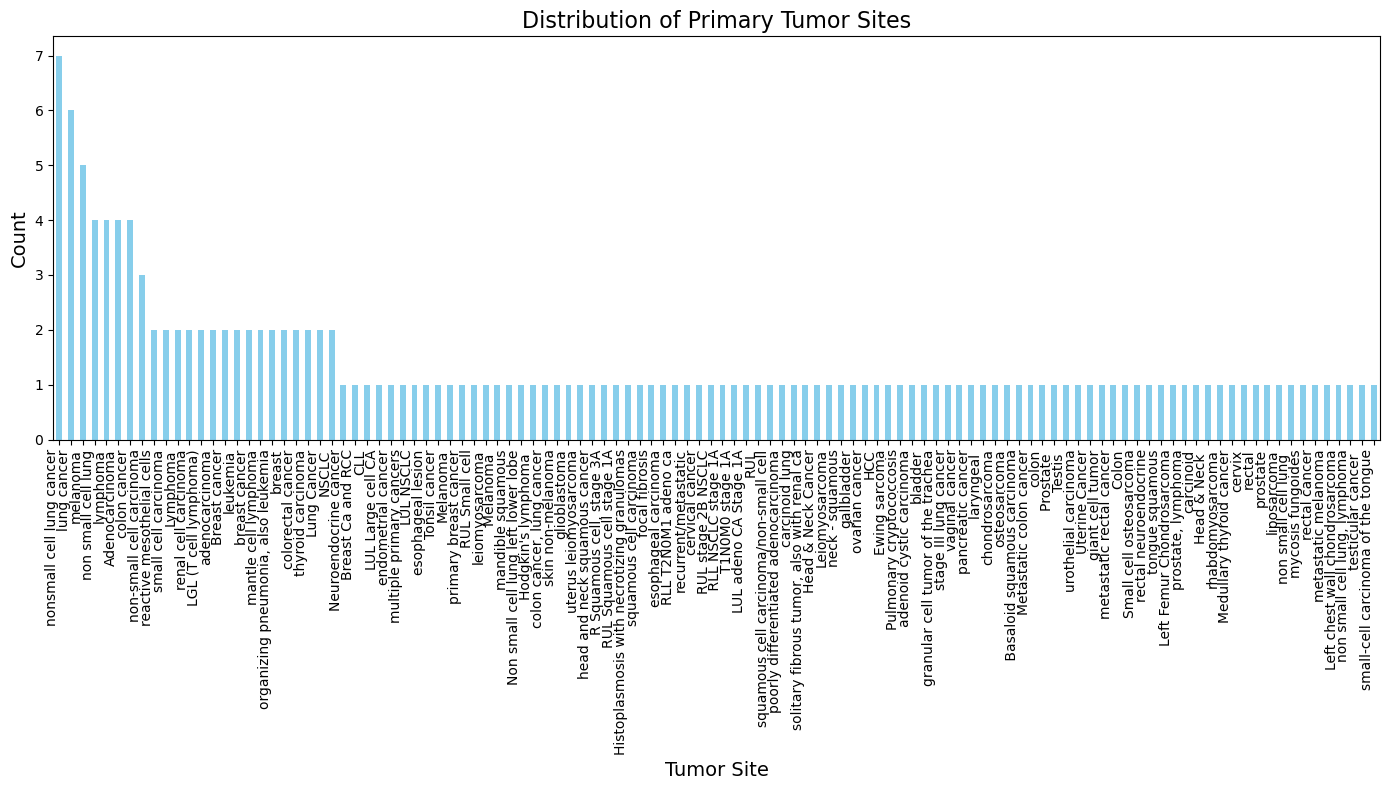

In [61]:
# Visualize the distribution of the primary tumor site
plt.figure(figsize=(14, 8))  
df1_sorted['Primary tumor site for metastatic disease'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Primary Tumor Sites', fontsize=16)
plt.xlabel('Tumor Site', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



The file **lidc-idri-nodule-counts-6-23-2015.xlsx** provides a summary of the nodules identified within each patient in the LIDC-IDRI dataset. 

In [65]:
#Ensure you have already performed - pip install openpyxl

df2= pd.read_excel('lidc-idri-nodule-counts-6-23-2015.xlsx')
df2_sorted= df2.sort_values(by= 'TCIA Patent ID')
df2_sorted

,TCIA Patent ID,Total Number of Nodules*,Number of Nodules >=3mm**,Number of Nodules <3mm***,Unnamed: 4,Unnamed: 5
0,LIDC-IDRI-0001,4,1,3,NaN,NaN
1,LIDC-IDRI-0002,12,1,11,NaN,*total number of lesions that received either ...
2,LIDC-IDRI-0003,4,4,0,NaN,"**total number of lesions that received a ""nod..."
3,LIDC-IDRI-0004,4,1,3,NaN,"***total number of lesions that received a ""no..."
4,LIDC-IDRI-0005,9,3,6,NaN,NaN
...,...,...,...,...,...,...
1014,LIDC-IDRI-1009,2,1,1,NaN,NaN
1015,LIDC-IDRI-1010,10,1,9,NaN,NaN
1016,LIDC-IDRI-1011,4,4,0,NaN,NaN
1017,LIDC-IDRI-1012,1,1,0,NaN,NaN


In [75]:
# Check for missing values in each column
missing_values_nodules = df2_sorted.isnull().sum()
print("Missing values per column:\n", missing_values_nodules)

Missing values per column:
 TCIA Patent ID                  1
Total Number of Nodules*        0
Number of Nodules >=3mm**       0
Number of Nodules <3mm***       0
Unnamed: 4                   1019
Unnamed: 5                   1016
dtype: int64


## Lung Nodules Analysis <a name="lung"></a>
[[go back to the top]](#contents)

Now, it’s time to analyze the lung nodules.

To do this, we'll use pylidc (https://pylidc.github.io/), a Python library designed for analyzing lung nodules in CT scans from the Lung Image Database Consortium (LIDC), which is the dataset we are working with. This library efficiently loads and manages images and annotations from the LIDC dataset, extracts features for detailed analysis of lung nodules, and displays CT scans, segmentations, and annotations for better interpretation.

We will experiment with various functions from the pylidc library to gain a deeper understanding of its capabilities.

In [18]:
scans = pl.query(pl.Scan).all()
print(scans[0])
print(len(scans))

Scan(id=1,patient_id=LIDC-IDRI-0078)
1018


In this Python script, we extract important imaging details for a patient, including pixel spacing, slice thickness, and slice spacing. While the current output shows a slice thickness of 3.0 mm, it's important to note that modern imaging techniques often achieve slice thicknesses as small as 1 mm or even 0.5 mm, offering significantly higher resolution and more detailed anatomical insights.

In [19]:
scans = pl.query(pl.Scan).all()
first_scan = scans[0]
print(f"Patient ID: {first_scan.patient_id}")
print(f"Pixel Spacing: {first_scan.pixel_spacing}")
print(f"Slice Thickness: {first_scan.slice_thickness}") #especificar o que significa 
print(f"Slice Spacing: {first_scan.slice_spacing}")

#total number of scans
print(f"Total Number of Scans: {len(scans)}")

Patient ID: LIDC-IDRI-0078
Pixel Spacing: 0.65
Slice Thickness: 3.0
Slice Spacing: 3.0
Total Number of Scans: 1018


In [20]:
print(len(scans[0].annotations))

13


In [21]:
annotations = pl.query(pl.Annotation).all() # as anotacoes fazem parte da biblioteca pylidc

# Print all annotations

for ann in annotations:
    print(ann)

Annotation(id=1,scan_id=1)
Annotation(id=2,scan_id=1)
Annotation(id=3,scan_id=1)
Annotation(id=4,scan_id=1)
Annotation(id=5,scan_id=1)
Annotation(id=6,scan_id=1)
Annotation(id=7,scan_id=1)
Annotation(id=8,scan_id=1)
Annotation(id=9,scan_id=1)
Annotation(id=10,scan_id=1)
Annotation(id=11,scan_id=1)
Annotation(id=12,scan_id=1)
Annotation(id=13,scan_id=1)
Annotation(id=14,scan_id=2)
Annotation(id=15,scan_id=2)
Annotation(id=16,scan_id=2)
Annotation(id=17,scan_id=2)
Annotation(id=18,scan_id=2)
Annotation(id=19,scan_id=2)
Annotation(id=20,scan_id=2)
Annotation(id=21,scan_id=2)
Annotation(id=22,scan_id=2)
Annotation(id=23,scan_id=3)
Annotation(id=24,scan_id=3)
Annotation(id=25,scan_id=3)
Annotation(id=26,scan_id=3)
Annotation(id=27,scan_id=4)
Annotation(id=28,scan_id=4)
Annotation(id=29,scan_id=5)
Annotation(id=30,scan_id=5)
Annotation(id=31,scan_id=5)
Annotation(id=32,scan_id=5)
Annotation(id=33,scan_id=5)
Annotation(id=34,scan_id=5)
Annotation(id=35,scan_id=6)
Annotation(id=36,scan_id=6)
A

In [22]:
scans[0].annotations

[Annotation(id=1,scan_id=1),
 Annotation(id=2,scan_id=1),
 Annotation(id=3,scan_id=1),
 Annotation(id=4,scan_id=1),
 Annotation(id=5,scan_id=1),
 Annotation(id=6,scan_id=1),
 Annotation(id=7,scan_id=1),
 Annotation(id=8,scan_id=1),
 Annotation(id=9,scan_id=1),
 Annotation(id=10,scan_id=1),
 Annotation(id=11,scan_id=1),
 Annotation(id=12,scan_id=1),
 Annotation(id=13,scan_id=1)]

In [23]:
scans = pl.query(pl.Scan).all()
nods = scans[0].cluster_annotations()
print("%s has %d nodules." % (scans[0], len(nods)))

for i,nod in enumerate(nods):
    print("Nodule %d has %d annotations." % (i+1, len(nods[i])))

Scan(id=1,patient_id=LIDC-IDRI-0078) has 4 nodules.
Nodule 1 has 4 annotations.
Nodule 2 has 4 annotations.
Nodule 3 has 1 annotations.
Nodule 4 has 4 annotations.


In [24]:
# Todos os CT scans com espessura de corte menor ou igual a 1 e um espaçamento de pixel menor ou igual a 0.6
scans = pl.query(pl.Scan).filter(pl.Scan.slice_thickness <= 1, pl.Scan.pixel_spacing <= 0.6)
print(scans.count())

#CT do paciente com o id LIDC-IDRI-0078
pid = 'LIDC-IDRI-0078'
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
print(scan)

31
Scan(id=1,patient_id=LIDC-IDRI-0078)


In [25]:
#Anotações com spiculation e malignancy igual a 5
anns = pl.query(pl.Annotation).filter(pl.Annotation.spiculation == 5,pl.Annotation.malignancy == 5)

#Numero de anotações que atendem aos critérios acima
print(anns.count())

91


In [26]:
#Primeira anotação com malignidade igual a 5
ann = pl.query(pl.Annotation).filter(pl.Annotation.malignancy == 5).first()

#Nível de malignancy: malignancy -> formato número; Malignancy -> formato texto
print(ann.malignancy, ann.Sphericity)

#Margem: margin -> formato número; Margin -> formato texto
print(ann.margin, ann.Margin)
# => 2, 'Near Poorly Defined'

#Todas as características que podem ser vistas
print(pl.annotation_feature_names)

#Tabela com todas as características da anotação
ann.print_formatted_feature_table()

5 Ovoid/Round
2 Near Poorly Defined
('subtlety', 'internalStructure', 'calcification', 'sphericity', 'margin', 'lobulation', 'spiculation', 'texture', 'malignancy')
Feature              Meaning                    # 
-                    -                          - 
Subtlety           | Obvious                  | 5 
Internalstructure  | Soft Tissue              | 1 
Calcification      | Absent                   | 6 
Sphericity         | Ovoid/Round              | 4 
Margin             | Near Poorly Defined      | 2 
Lobulation         | Near Marked Lobulation   | 4 
Spiculation        | No Spiculation           | 1 
Texture            | Solid                    | 5 
Malignancy         | Highly Suspicious        | 5 


In [27]:
# Vamos supor que você tenha acesso a todas as anotações
annotations = pl.query(pl.Annotation).all()

# Vamos criar um dicionário para armazenar os valores mínimos e máximos de cada feature
features_range = {}

for ann in annotations:
    # Para cada feature que pode ser acessada, vamos verificar seu valor mínimo e máximo
    for feature_name in pl.annotation_feature_names:
        feature_value = getattr(ann, feature_name, None)  # Pega o valor da feature

        if feature_value is not None:
            # Atualiza o valor mínimo e máximo da feature
            if feature_name not in features_range:
                features_range[feature_name] = {'min': feature_value, 'max': feature_value}
            else:
                features_range[feature_name]['min'] = min(features_range[feature_name]['min'], feature_value)
                features_range[feature_name]['max'] = max(features_range[feature_name]['max'], feature_value)

# Imprime o intervalo de cada feature
for feature, range_values in features_range.items():
    print(f"{feature}: Min = {range_values['min']}, Max = {range_values['max']}")

subtlety: Min = 1, Max = 5
internalStructure: Min = 1, Max = 5
calcification: Min = 1, Max = 6
sphericity: Min = 1, Max = 5
margin: Min = 1, Max = 5
lobulation: Min = 1, Max = 5
spiculation: Min = 1, Max = 5
texture: Min = 1, Max = 5
malignancy: Min = 1, Max = 5


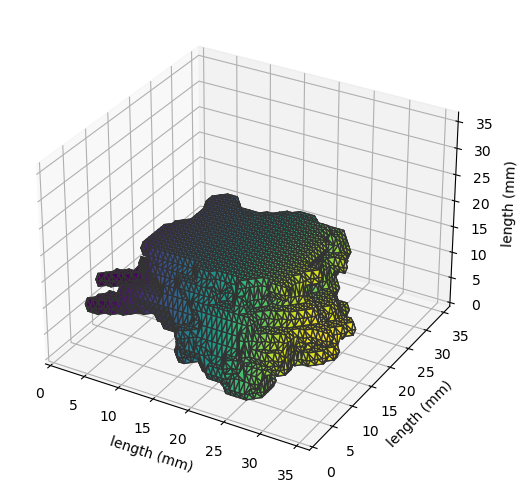

In [30]:
pid = 'LIDC-IDRI-0001'  # Patient ID
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == pid).first()
ann = scan.annotations
ann0 = ann[0]

# Visualize in 3D
ann0.visualize_in_3d()


In [29]:
#TABELA EM PROCESSO, NAO APAGAR POR FAVOR 


# Obter todas as features disponíveis
features = pl.annotation_feature_names
print(features)

# Inicializar a tabela
tabela_features = []

# Criar a tabela com as características e níveis
for feature in features:
    feature_upper = feature[0].upper() + feature[1:]  # Colocar a primeira letra em maiúscula
    feature_value = getattr(ann, feature_upper)  # Usar getattr para acessar o valor da feature
    if feature == 'calcification':
        for j in range(1, 7):  # Níveis de 1 a 6 para calcification
            pl.Annotation.{feature}== j
            tabela_features.append(f"{feature_upper} -> {feature_value} ({j})")
    else:
        for j in range(1, 6):  # Níveis de 1 a 5 para outras características
            tabela_features.append(f"{feature_upper} -> {feature_value} ({j})")

# Exibir a tabela
print("{:<30} | {}".format("Feature", "Nível"))
print("-" * 50)
for linha in tabela_features:
    print(linha)

SyntaxError: invalid syntax (3960830877.py, line 17)

In [31]:
ann = pl.query(pl.Annotation).all()
df_pylidc = pd.DataFrame(columns= [
                            'patient_id', 
                            'annotation_id',
                            'scan_id',
                            
                            'slice_thickness',
                            'pixel_spacing',

                            'subtlety', 
                            'internalStructure', 
                            'calcification', 
                            'sphericity', 
                            'margin', 
                            'lobulation', 
                            'spiculation', 
                            'texture',

                            'malignancy',
                            ])


#'diameter',
                            #'surface_area',
                            #'volume',
df_pylidc

,patient_id,annotation_id,scan_id,slice_thickness,pixel_spacing,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,malignancy


In [32]:


#adicionar #'diameter',
                            #'surface_area',
                            #'volume',
# Inicializar uma lista vazia para armazenar os dados
data_list = []

for i in range(len(ann)):
    # Criar um dicionário com as colunas do DataFrame
    att  = dict((col, "") for col in df_pylidc.columns)

    # Identificação do paciente e anotação
    att['patient_id'] = ann[i].scan.patient_id
    att['annotation_id'] = ann[i].id  
    att['scan_id'] = ann[i].scan.id

    # Features: slice thickness e pixel spacing
    st = pl.query(pl.Scan.slice_thickness).filter(pl.Scan.id == att['scan_id'])
    s = str(st[0])
    att['slice_thickness'] = float(s[1:4])
    
    ps = pl.query(pl.Scan.pixel_spacing).filter(pl.Scan.id == att['scan_id'])
    p = str(ps[0])
    att['pixel_spacing'] = float(p[1:5])

    # Outras características
    att['subtlety'] = ann[i].subtlety
    att['internalStructure'] = ann[i].internalStructure 
    att['calcification'] = ann[i].calcification 
    att['sphericity'] = ann[i].sphericity
    att['margin'] = ann[i].margin  
    att['lobulation'] = ann[i].lobulation
    att['spiculation'] = ann[i].spiculation 
    att['texture'] = ann[i].texture

    # Target: Malignidade
    att['malignancy'] = ann[i].malignancy  

    # Adicionar o dicionário à lista de dados
    data_list.append(att)

# Converter a lista de dicionários em um DataFrame
df_pylidc = pd.DataFrame(data_list)
df_pylidc_sorted = df_pylidc.sort_values(by=['patient_id', 'annotation_id']) #ORDENADOOOO


# Salvar o DataFrame em um arquivo CSV
df_pylidc.to_csv('pylidc_features.csv', sep=',', index=False)
df_pylidc_sorted.to_csv('pylidc_features_sorted.csv', sep=',', index=False)

In [33]:
#verificar que nao há valores nulos

patients = np.unique(df_pylidc_sorted.patient_id)
print(f"Total number of patients: {len(patients)} \n")

df_pylidc_sorted.info()

Total number of patients: 875 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6859 entries, 83 to 4480
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         6859 non-null   object 
 1   annotation_id      6859 non-null   int64  
 2   scan_id            6859 non-null   int64  
 3   slice_thickness    6859 non-null   float64
 4   pixel_spacing      6859 non-null   float64
 5   subtlety           6859 non-null   int64  
 6   internalStructure  6859 non-null   int64  
 7   calcification      6859 non-null   int64  
 8   sphericity         6859 non-null   int64  
 9   margin             6859 non-null   int64  
 10  lobulation         6859 non-null   int64  
 11  spiculation        6859 non-null   int64  
 12  texture            6859 non-null   int64  
 13  malignancy         6859 non-null   int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 803.8+ KB


In [34]:
meta= pd.read_csv('metadata.csv')
meta.head(1)

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
1.3.6.1.4.1.14519.5.2.1.6279.6001.154145395981214039394434950814,LIDC-IDRI,NaN,https://doi.org/10.7937/K9/TCIA.2015.LO9QL9SX,LIDC-IDRI-0011,1.3.6.1.4.1.14519.5.2.1.6279.6001.129840843404...,NaN,01-01-2000,NaN,GE MEDICAL SYSTEMS,DX,Digital X-Ray Image Storage - For Presentation,1.2.840.10008.5.1.4.1.1.1.1,2,15,20 MB,./LIDC-IDRI/LIDC-IDRI-0011/01-01-2000-NA-NA-55...,2024-09-26T19:16:51.099


In [35]:
meta.columns 

Index(['Series UID', 'Collection', '3rd Party Analysis',
       'Data Description URI', 'Subject ID', 'Study UID', 'Study Description',
       'Study Date', 'Series Description', 'Manufacturer', 'Modality',
       'SOP Class Name', 'SOP Class UID', 'Number of Images', 'File Size',
       'File Location', 'Download Timestamp'],
      dtype='object')

In [36]:
dir = meta.iloc[3]['File Location']
dir

'./LIDC-IDRI/LIDC-IDRI-0069/01-01-2000-NA-NA-29787/3079.000000-NA-04249'

In [37]:
CT_folder = os.path.join(dir)
ct1 = pydicom.read_file(os.path.join(CT_folder, '1-001.dcm'))
ct2 = pydicom.read_file(os.path.join(CT_folder, '1-114.dcm'))
image1 = ct1.pixel_array
image2 = ct2.pixel_array
image1 = ct1.RescaleSlope * image1 + ct1.RescaleIntercept
image2 = ct2.RescaleSlope * image2 + ct2.RescaleIntercept

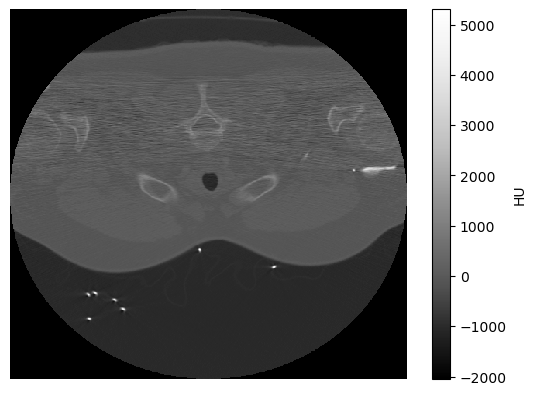

In [38]:
plt.pcolormesh(image1, cmap='Greys_r')
plt.colorbar(label='HU')
plt.axis('off')
plt.show()

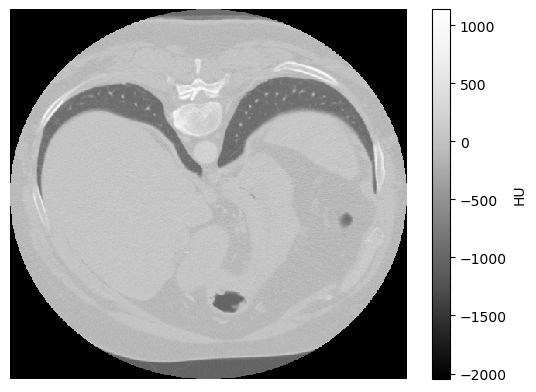

In [39]:
plt.pcolormesh(image2, cmap='Greys_r')
plt.colorbar(label='HU')
plt.axis('off')
plt.show()

## References <a name="references"></a>
[[go back to the top]](#references)

[1] Armato III, Samuel G., et al. "The Lung Image Database Consortium (LIDC) and Image Database Resource Initiative (IDRI): A completed reference database of lung nodules on CT scans." *Medical Physics*, 2011. Available at: [https://www.cancerimagingarchive.net/collection/lidc-idri/](https://www.cancerimagingarchive.net/collection/lidc-idri/).